# **INFO284 - Group exam 2023**

### **Candidate 111 & 158**

All the sources we have used for this exam is listed during the answer. 

**Information about task 1:**

We have provided the *agaricus-lepiota.csv* in the zip file. 

**Information about task 2:**

The zip file has a folder called 3class, which contains the data sets to perform task 2.

**Information about task 3:**

The zip file contains the picture we have tested on our model, *horse.jpg*, and a folder called *cifar-10-batches-py* that consists of the files used for traing- and test data. 

### **Task 1:** Machine learning on tabular mushrooms

In this part of the project we will predict the edibility of the mushrooms given in the UCI data set, using different machine learning models. We have used https://www.kaggle.com/code/nalkrolu/association-rules-and-classification-mushrooms for inspiration.

First, we import necessary packages that we want to use. 

In [647]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from matplotlib import pyplot 
from dython.nominal import associations 
from dython.nominal import identify_nominal_columns 


Then we read in the UCI data set of the mushrooms using pandas, and take a look on the data using .head() to get an overview of what the data looks like. 

In [648]:
mushrooms_data = pd.read_csv("agaricus-lepiota.csv", header=None)

mushrooms_data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


From the table above, we can see that the columns does not have any names describing what the different letters mean. By reading in the agaricus-lepiota text file, we see under *Attribute information* that there are different variables describing the different letters in each column. 

To make it easier to understand and work with, we added names to each column. 

In [649]:
mushrooms_data.columns = ["classes", "cap-shape", "cap-surface", "cap-color", "bruises?", "odor", "gill-attachment", "gill-spacing", "gill-size",
"gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", 
"stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]

mushrooms_data.head()

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


After adding names to the different columns, we check the data set for missing values. 

In [650]:
mushrooms_data.isna().sum()

classes                     0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no missing values in the data set, but in the agaricus-lepiota text file it says that there are 2480 missing attribute values for attribute 11, and that the missing values are denoted by "?". So we check the data set for "?".

In [651]:
mushrooms_data[mushrooms_data == "?"].count()

classes                        0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises?                       0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

By looking at the result above, we see that the information from the text file matches our result.

For better visualizations we map e and p to edible and poisonous, and make a plot to show the number of edible compared to the number of poisonous. We also len() below to get the exact numbers of edible and poisonous.

In [652]:
mushrooms_data["classes"] = mushrooms_data["classes"].map({"e": "Edible", "p": "Poisonous"})

<AxesSubplot:xlabel='classes', ylabel='count'>

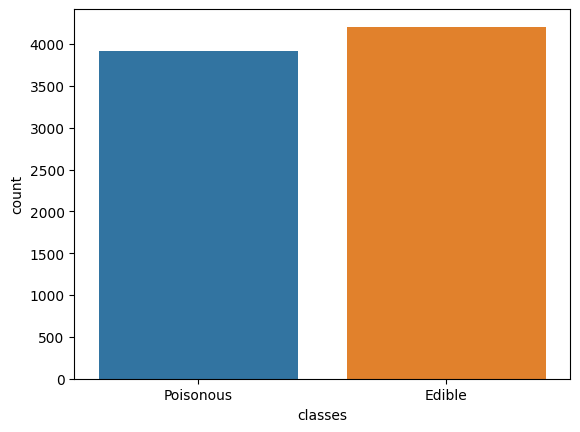

In [653]:
sns.countplot(x="classes", data=mushrooms_data)

In [654]:
print("Poisonous: " ,len(mushrooms_data[mushrooms_data["classes"] == "Poisonous"]))
print("Edible:" ,len(mushrooms_data[mushrooms_data["classes"] == "Edible"]))

Poisonous:  3916
Edible: 4208


From the plot above and then len() function, we can see that the number of edible and poisonous mushrooms are almost the same. There are approximately 300 more edible mushrooms than poisonous. 

Then we try to find which values of the features that correlates with the classes, edible and poisonous. First a figure for each class, then a heatmap for all the classes to see the correlation between the classes and the different categories. 

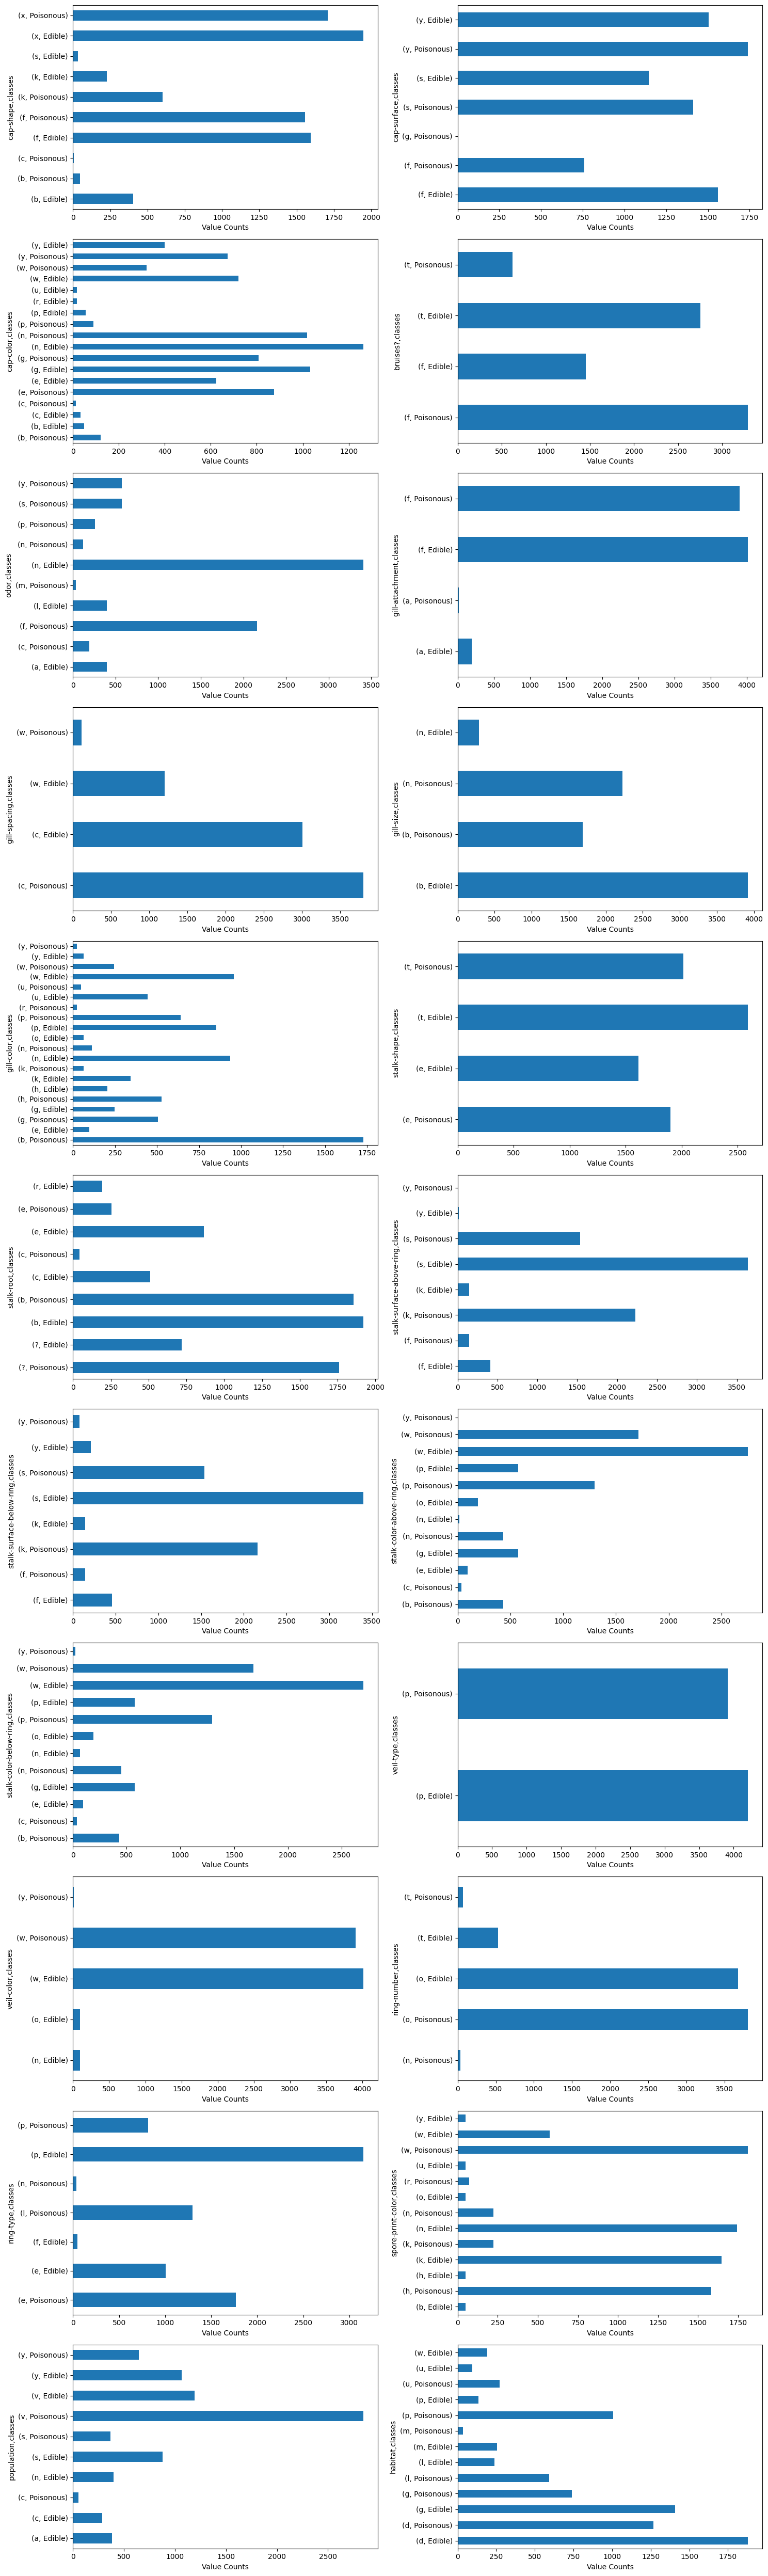

In [655]:
plt.figure(figsize=(15,50))
for i,j in zip(mushrooms_data.iloc[:,1:].columns,range(1,23)):
    plt.subplot(11,2,j)
    mushrooms_data.groupby(i)['classes'].value_counts().plot(kind="barh")
    plt.xlabel("Value Counts")
plt.tight_layout()

To make the heatmap and see the correlation we used dython.

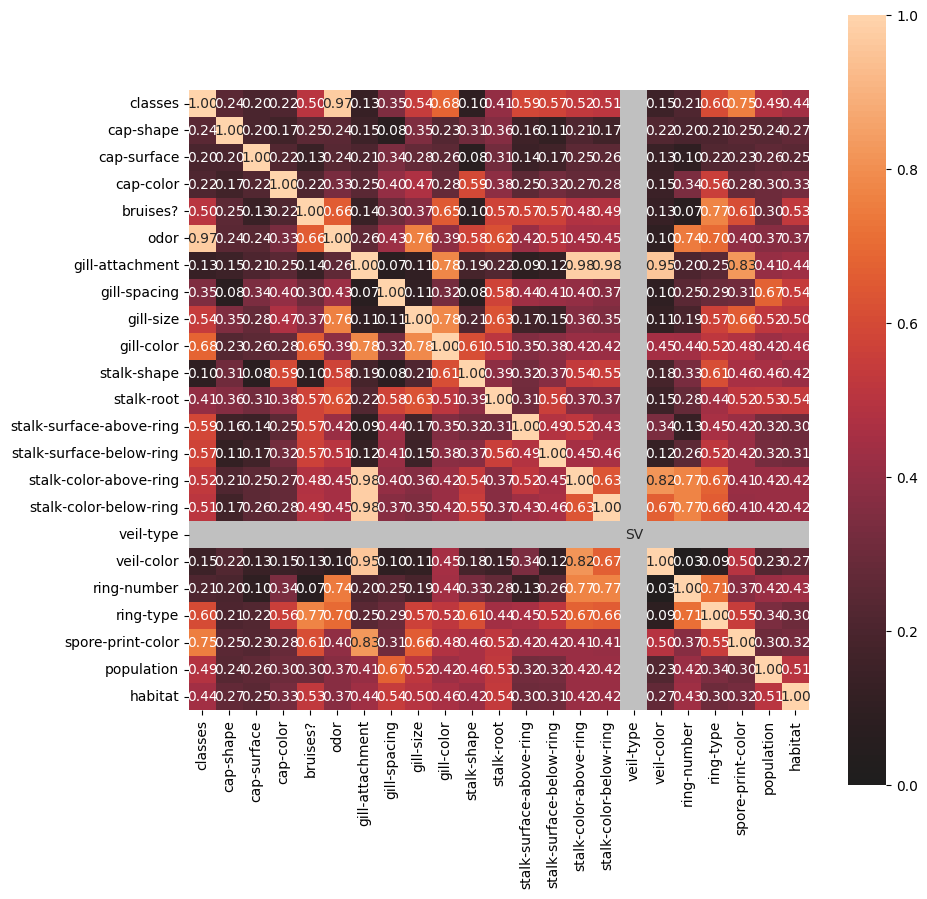

C:\Users\julie\AppData\Local\Temp\ipykernel_16648\2571841615.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
classes,1.00,0.24,0.20,0.22,0.50,0.97,0.13,0.35,0.54,0.68,0.10,0.41,0.59,0.57,0.52,0.51,0.00,0.15,0.21,0.60,0.75,0.49,0.44
cap-shape,0.24,1.00,0.20,0.17,0.25,0.24,0.15,0.08,0.35,0.23,0.31,0.36,0.16,0.11,0.21,0.17,0.00,0.22,0.20,0.21,0.25,0.24,0.27
cap-surface,0.20,0.20,1.00,0.22,0.13,0.24,0.21,0.34,0.28,0.26,0.08,0.31,0.14,0.17,0.25,0.26,0.00,0.13,0.10,0.22,0.23,0.26,0.25
cap-color,0.22,0.17,0.22,1.00,0.22,0.33,0.25,0.40,0.47,0.28,0.59,0.38,0.25,0.32,0.27,0.28,0.00,0.15,0.34,0.56,0.28,0.30,0.33
bruises?,0.50,0.25,0.13,0.22,1.00,0.66,0.14,0.30,0.37,0.65,0.10,0.57,0.57,0.57,0.48,0.49,0.00,0.13,0.07,0.77,0.61,0.30,0.53
odor,0.97,0.24,0.24,0.33,0.66,1.00,0.26,0.43,0.76,0.39,0.58,0.62,0.42,0.51,0.45,0.45,0.00,0.10,0.74,0.70,0.40,0.37,0.37
gill-attachment,0.13,0.15,0.21,0.25,0.14,0.26,1.00,0.07,0.11,0.78,0.19,0.22,0.09,0.12,0.98,0.98,0.00,0.95,0.20,0.25,0.83,0.41,0.44
gill-spacing,0.35,0.08,0.34,0.40,0.30,0.43,0.07,1.00,0.11,0.32,0.08,0.58,0.44,0.41,0.40,0.37,0.00,0.10,0.25,0.29,0.31,0.67,0.54
gill-size,0.54,0.35,0.28,0.47,0.37,0.76,0.11,0.11,1.00,0.78,0.21,0.63,0.17,0.15,0.36,0.35,0.00,0.11,0.19,0.57,0.66,0.52,0.50
gill-color,0.68,0.23,0.26,0.28,0.65,0.39,0.78,0.32,0.78,1.00,0.61,0.51,0.35,0.38,0.42,0.42,0.00,0.45,0.44,0.52,0.48,0.42,0.46


In [656]:
categorical_features=identify_nominal_columns(mushrooms_data)
complete_correlation= associations(mushrooms_data, filename= 'complete_correlation.png', figsize=(10,10))
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

By looking at the heatmap and take the missing values into consideration, we decided to drop the following features: 
- Stalk-root.
- Stalk-shape. 
- Veil-type.
- Veil-color. 
- Ring-number. 
- Gill-attachment. 
- Cap-surface.
- Cap-color.
- Cap-shape. 


Veil-type and veil-color have approximately the same value count for both edible and poisonous, so it will not influence the prediction a lot, and it does not have a high correlation with the classes. 

Stalk-root has a lot of missing values, so we drop that one as well. We could have checked this by imputation, but the integrity of the dataset would have been less good. 

The remaining features are dropped because of the low correlation between the features and the classes. 

In [657]:
mushrooms_data = mushrooms_data.drop(["stalk-root", "stalk-shape", "veil-type", "veil-color", "ring-number", "gill-attachment", "cap-surface", "cap-color", "cap-shape"], axis=1)

In addition to removing some features, we also wanted to save the features with good correlation in a list, in case we wanted to test our model with selected features later on. These are the features with higher than 0.5 correlation with classes, that means they are most indicative of edible mushrooms.

In [658]:
selected_features = ["odor", "gill-size", "gill-color", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "ring-type", "spore-print-color"]

#### Data splitting

Now we have a clean data set, and can split the data set into training, validation and test data.

In [659]:
y = mushrooms_data["classes"]
X = mushrooms_data.drop("classes", axis=1)

To make it possible to test with selected features later, we made some dataset, that included only the selected features from above. 

In [660]:
y_selected = mushrooms_data["classes"]
X_selected = mushrooms_data.loc[:, selected_features]

For the models to work we need to transform categorical values to numerical values. For the classes column we only have the values n and p so we can replace them with 1 and 0. For the other features there are more than two values so we made dummy variables using pandas and get_dummies().

In [661]:
mushrooms_data["classes"] = mushrooms_data["classes"].replace("Poisonous", 0)
mushrooms_data["classes"] = mushrooms_data["classes"].replace("Edible", 1)
X = pd.get_dummies(X)
X_selected = pd.get_dummies(X_selected)

In [662]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [663]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_selected, y_selected, test_size=0.3)
X_test_s, X_val_s, y_test_s, y_val_s = train_test_split(X_test_s, y_test_s, test_size=0.5)

#### Models with all features

##### *Multinomial Naive Bayes*

Multinomial Naive Bayes (MNB) is a algorithm that is based on Bayes theorem. It assumes count data and is mostly used in text data classification. It is easy to implement, it can handle large datasets and you can use it on both continuous and discrete data. The algorithm has lower prediction accuracy than other probability algorithms. 

Our case is not text data classification so therefore this model may performe worse than the others.

https://www.upgrad.com/blog/multinomial-naive-bayes-explained/ 


In [664]:
mnb = MultinomialNB() 
mnb.fit(X_train, y_train)

val_score = mnb.score(X_val, y_val)
print("Validation score: ", val_score)

test_score = mnb.score(X_test, y_test)
print("Test score: ", test_score)

pred = mnb.predict(X_test)

Validation score:  0.9622641509433962
Test score:  0.9507793273174734


##### *k-Nearest Neighbors*

k-Nearest Neighbors (kNN) is a very simple machine learning algorithm. It can be used for both classification and regression. It is used for classification or predictions about the grouping of an individual data point. 

We use it to see if the training data is overfitted. 

We tested with k=1 and k=50. 

https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn 

https://www.ibm.com/topics/knn 

In [665]:
knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)

val_score = knn.score(X_val, y_val)
print("Validation score: ", val_score)

test_score = knn.score(X_test, y_test)
print("Test score: ", test_score)

pred = knn.predict(X_test)

Validation score:  1.0
Test score:  1.0


In [666]:
knn = KNeighborsClassifier(50)
knn.fit(X_train, y_train)

val_score = knn.score(X_val, y_val)
print("Validation score: ", val_score)

test_score = knn.score(X_test, y_test)
print("Test score: ", test_score)

pred = knn.predict(X_test)

Validation score:  0.9983593109105825
Test score:  0.9983593109105825


We got a score under 1 for k=50 so we can assume that our training data is not overfitted. 

##### *Decision Tree Classifier* 

Decision Tree Classifier (DTC) is a algorithm that uses a set of ules to make decisions. It can perform both classification and regression tasks. By using the dataset features to create yes/no questions, the algorithm split the dataset until all data points belonging to each class. The data is then organized in a tree structure, so each question results in adding a node to the tree. 


The decision tree classifier is simple but can often overfit on training data. 

https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575 

In [667]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

val_score = dtc.score(X_val, y_val)
print("Validation score: ", val_score)

test_score = dtc.score(X_test, y_test)
print("Test score: ", test_score)

pred = dtc.predict(X_test)

Validation score:  1.0
Test score:  1.0


##### *Random Forest Classifier* 

Random Forest Classifier (RFC) is a collection of decision trees, and has lower risk of overfitting than a single decision tree. It is more complex than k-NN and Multinomial Naive Bayes.

Each individual tree in the random forest splits out a class prediction and the class with the most votes becomes our model's prediction. 

https://towardsdatascience.com/understanding-random-forest-58381e0602d2 

In [668]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

val_score = rfc.score(X_val, y_val)
print("Validation score: ", val_score)

test_score = rfc.score(X_test, y_test) 
print("Test score: ", test_score)

pred = rfc.predict(X_test)          

Validation score:  1.0
Test score:  1.0


##### *Support Vector Classification*

Support Vector Classification (SVC) is a support vector machine class for classification. If the hyperplane that are used for classification is in linear condition, then the condition is SVC. 

https://www.analyticsvidhya.com/blog/2021/06/support-vector-machine-better-understanding/ 

In [669]:
svc = SVC()
svc.fit(X_train, y_train)

val_score = svc.score(X_val, y_val)
print("Validation score: ", val_score)

test_score = svc.score(X_test, y_test)
print("Test score: ", test_score)

y_pred = svc.predict(X_test)

Validation score:  1.0
Test score:  1.0


#### Models with selected features

We wanted to test the same models as above with the selected features from the correlation matrix. We did it the exactly same way as for all features, just changed the train-, validation- and test data.

##### *Multinomial Naive Bayes*

In [670]:
mnb = MultinomialNB() 
mnb.fit(X_train_s, y_train_s)

val_score = mnb.score(X_val_s, y_val_s)
print("Validation score: ", val_score)

test_score = mnb.score(X_test_s, y_test_s)
print("Test score: ", test_score)

pred = mnb.predict(X_test_s)

Validation score:  0.9647251845775225
Test score:  0.9696472518457753


##### *k-Nearest Neighbors*

In [671]:
knn = KNeighborsClassifier(1)
knn.fit(X_train_s, y_train_s)

val_score = knn.score(X_val_s, y_val_s)
print("Validation score: ", val_score)

test_score = knn.score(X_test_s, y_test_s)
print("Test score: ", test_score)

pred = knn.predict(X_test_s)

Validation score:  1.0
Test score:  1.0


In [672]:
knn = KNeighborsClassifier(50)
knn.fit(X_train_s, y_train_s)

val_score = knn.score(X_val_s, y_val_s)
print("Validation score: ", val_score)

test_score = knn.score(X_test_s, y_test_s)
print("Test score: ", test_score)

pred = knn.predict(X_test_s)

Validation score:  0.992616899097621
Test score:  0.9958982772764561


##### *Decision Tree Classifier* 

In [673]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_s, y_train_s)

val_score = dtc.score(X_val_s, y_val_s)
print("Validation score: ", val_score)

test_score = dtc.score(X_test_s, y_test_s)
print("Test score: ", test_score)

pred = dtc.predict(X_test_s)

Validation score:  1.0
Test score:  1.0


##### *Random Forest Classifier* 

In [674]:
rfc = RandomForestClassifier()
rfc.fit(X_train_s, y_train_s)

val_score = rfc.score(X_val_s, y_val_s)
print("Validation score: ", val_score)

test_score = rfc.score(X_test_s, y_test_s) 
print("Test score: ", test_score)

pred = rfc.predict(X_test_s) 

Validation score:  1.0
Test score:  1.0


##### *Support Vector Classification*

In [675]:
svc = SVC()
svc.fit(X_train_s, y_train_s)

val_score = svc.score(X_val_s, y_val_s)
print("Validation score: ", val_score)

test_score = svc.score(X_test_s, y_test_s)
print("Test score: ", test_score)

pred = svc.predict(X_test_s)

Validation score:  0.9983593109105825
Test score:  0.9991796554552912


#### Results and discussion

All the models we have tested give a good score, and pretty much the same score. We think that all of them would work good for classification of edible and poisonous mushrooms, but we choose to proceed with Support Vector Classification.

#### Classification report

In [676]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       638
   Poisonous       1.00      1.00      1.00       581

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



The precision score of 1.0 for each class in the classification report indicates that all samples that were classified as belonging to a particular class were actually of that class. Similarly, the recall score of 1.0 for each class indicates that the model has correctly identified all the samples that belong to that class. The F1-score of 1.0 for each class is the harmonic mean of precision and recall, indicating that the model has achieved both high precision and high recall. The accuracy is 1.0 which can suggest that our model is overfitted, but since we are dealing with a small dataset we can accept an accuracy of 1.0. 

It performs good, but if we had a bigger dataset, our model would maybe be more trustworthy for classification of edible and poisonous mushrooms.

#### Cross-validation

In [677]:
scores = cross_val_score(svc, X, y, cv=5)
print("Cross-validation scores: ", scores)
print("Mean score: ", np.mean(scores))
print("Standard deviation: ", np.std(scores))

Cross-validation scores:  [0.84738462 1.         0.99569231 1.         0.87684729]
Mean score:  0.9439848427434635
Standard deviation:  0.06751016581902088


The goal of cross-validation is to test how our model generalizes. The mean score tells us that our model has an accuracy of about 94 % across all folds, on average.

The standard deviation tells us that the accuracy can vary by around 6.75 % from the mean score. 

### **Task 2:** Sentiment analysis

In this part of the project we will build a model that can classify around 10000 sentences to positive, neutral and negative. 

In [678]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.corpus import stopwords
stop_words = set(stopwords.words("norwegian"))
import re
from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()
import spacy


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\julie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\julie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


We start by reading in the three JSON-files in the folder 3class. 

In [679]:
train = pd.read_json("3class/train.json")
test = pd.read_json("3class/test.json")
dev = pd.read_json("3class/dev.json")

By using .head() on one of the files, we can see how the data looks. 

We also took a look at one of the sentences.

In [680]:
train.head()

,sent_id,text,label
0,201911-01-01,Philips 190G6,Neutral
1,201911-02-01,Med integrerte høyttalere som på ingen måte er...,Neutral
2,201911-02-02,Eller bedrar skinnet ?,Negative
3,201911-03-01,"De fleste skjermer har et diskret design , med...",Neutral
4,201911-03-02,Men 190G6 fra Philips er en helt annen historie .,Neutral


In [681]:
train["text"][100]

'Det er slutt på den tida da film-ungdom var spedlemma , men pene små fyrer .'

By using .value_counts() we can see how many of the sentences that are classified as neutral, positive and negative. We do this to get a picture of how many there are of each. 

In [682]:
train["label"].value_counts()

Neutral     4079
Positive    2624
Negative    1270
Name: label, dtype: int64

Then we check for missing values.

In [683]:
print(train.isna().sum())
print(test.isna().sum())
print(dev.isna().sum())

sent_id    0
text       0
label      0
dtype: int64
sent_id    0
text       0
label      0
dtype: int64
sent_id    0
text       0
label      0
dtype: int64


There are no missing values in any of the datasets. We went on with separating the three different datasets into X and y. 

In [684]:
X_train = train["text"]
y_train = train["label"]

In [685]:
X_test = test["text"]
y_test = test["label"]

In [686]:
X_dev = dev["text"]
y_dev = dev["label"]

### Text preprocessing

After we had a look on the data, we started text preprocessing. 

In [687]:
nlp = spacy.load('nb_core_news_sm')
stopwords = nlp.Defaults.stop_words.difference({"ikke", "nei", "aldri", ",", "."})

To show our text preprocessing steps we use an example sentence. We used spaCy for processing, it is a open-source library with built-in capabilities for NLP in Python. It is designed to make it easy to build systems for information extraction or general-purpose natural language processing. 

https://realpython.com/natural-language-processing-spacy-python/

In [688]:
ex = train['text'][1235]
ex

'Herlig er det da å tenke på at RS5 ’ en også kan være snill som et lam og kjøres av selv bestemoren din .'

We convert the text to lower case. 

In [689]:
ex = ex.lower()
ex

'herlig er det da å tenke på at rs5 ’ en også kan være snill som et lam og kjøres av selv bestemoren din .'

Then we remove special characters and numbers

In [690]:
ex = re.sub(r"[^a-zæøå]", " ", ex)
ex

'herlig er det da å tenke på at rs    en også kan være snill som et lam og kjøres av selv bestemoren din  '

Then we removed stop words. 

In [691]:
doc = nlp(ex)
filtered_ex = [token.lemma_ for token in doc if token.text not in stopwords and token.lemma_ != '-PRON-' and len(token.lemma_) > 1]
text = " ".join(ex)
ex

'herlig er det da å tenke på at rs    en også kan være snill som et lam og kjøres av selv bestemoren din  '

To make the process easier we made a function we could use on all three datasets.

In [692]:
def text_preprocessing(texts):
    preprocessed_texts = []
    for text in texts:
        # Converting to lowercase
        text = text.lower()
        
        # Remove special characters and numbers
        text = re.sub(r"[^a-zæøå]", " ", text)
        text = re.sub(r"\d+", "", text)
        
        # Remove stop words
        doc = nlp(text)
        filtered_text = [token.lemma_ for token in doc if token.text not in stopwords and token.lemma_ != '-PRON-' and len(token.lemma_) > 1]
        text = " ".join(filtered_text)
        
        # Joining the words
        preprocessed_texts.append(text)
    
    return preprocessed_texts


In [693]:
%%python
import nltk
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\julie\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Below we have used the function from above on the three datasets.

In [694]:
X_train_preprocessed = text_preprocessing(X_train)
X_test_preprocessed = text_preprocessing(X_test)
X_dev_preprocessed = text_preprocessing(X_dev)

#### Analyzing the data

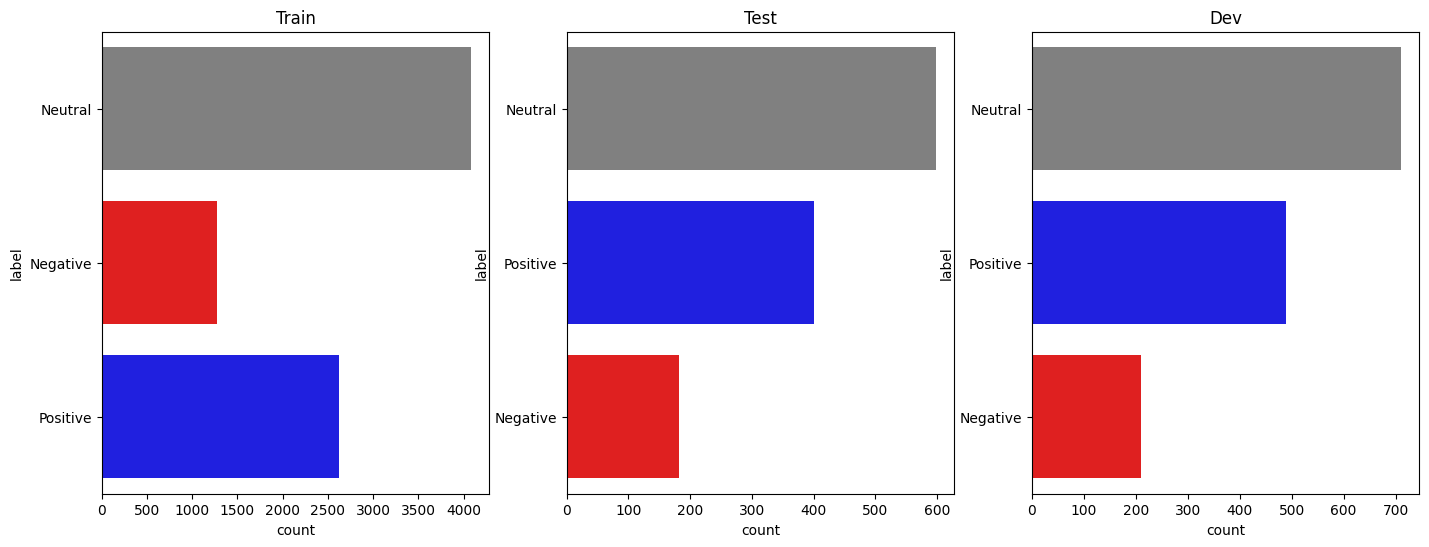

In [695]:
fig, axs = plt.subplots(ncols=3, figsize=(17,6))
colors = {'Positive': 'blue', 'Neutral': 'gray', 'Negative': 'red'}

sns.countplot(y=y_train, ax=axs[0], palette=colors)
axs[0].set_title('Train')
sns.countplot(y=y_test, ax=axs[1], palette=colors)
axs[1].set_title('Test')
sns.countplot(y=y_dev, ax=axs[2], palette=colors)
axs[2].set_title('Dev')

plt.show()

All of the datasets have most neutral words. The training data have more positive words than negative, which is the opposite for the testing and dev sets. 

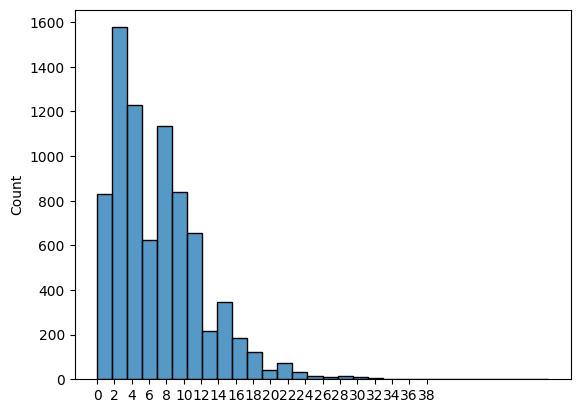

In [696]:
text_lengths = [len(text.split()) for text in X_train_preprocessed]
sns.histplot(text_lengths, bins=30)
plt.xticks(np.arange(0, 40, 2))
plt.show()

From the graph, it is clear that there are a lot of words that consist of only one or two letters. We need to investigate these words further to find out if they are important for our classification task.

In [697]:
words_list = ' '.join(X_train_preprocessed).split()
sorted_words = sorted(words_list, key=len)
# The 100 shortest words
print(sorted_words[:100])

['g.', 'g.', 'du', 'pc', 'to', 'ta', 'si', 'to', 'ki', 'tv', 'en', 'ta', 'gi', 'jo', 'bo', 'jo', 'ny', 'le', 'øy', 'si', 'si', 'is', 'du', 'VG', 'ny', 'to', 'to', 'ta', 'gi', 'hd', 'VG', 'fi', 'Hd', 'ps', 'ms', 'hd', 'du', 'of', 'ta', 'ta', 'du', 'be', 'of', 'ny', 'of', 'g.', 'VG', 'vm', 'vm', 'vm', 'm.', 'g.', 'br', 'gq', 'm.', 'vm', 'vm', 'vm', 'vm', 'to', 'vm', 'vm', 'si', 'gi', 'ha', 'vm', 'vm', 'm.', 'vm', 'vm', 'år', 'vm', 'di', 'vm', 'vm', 'g.', 'ns', 'by', 'in', 'vm', 'm.', 'in', 'tv', 'to', 'm.', 'kø', 'en', 're', 'to', 'mr', 'år', 'sy', 'en', 'ss', 'år', 'be', 'be', 'år', 'rå', 'år']


As we can see, these words do not carry much significance. Therefore, we will remove them and also remove the punctuation marks. 

In [698]:
import string
def remove_short_words_and_punctuations(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    words_list = text.split()
    words_list_filtered = [word for word in words_list if len(word) > 1]
    cleaned_text = ' '.join(words_list_filtered)

    return cleaned_text

Looking at the example sentence once again. 

In [699]:
print(ex)
print(remove_short_words_and_punctuations(ex))

herlig er det da å tenke på at rs    en også kan være snill som et lam og kjøres av selv bestemoren din  
herlig er det da tenke på at rs en også kan være snill som et lam og kjøres av selv bestemoren din


In [700]:
X_train_preprocessed = [remove_short_words_and_punctuations(text) for text in X_train_preprocessed]
X_test_preprocessed = [remove_short_words_and_punctuations(text) for text in X_test_preprocessed]
X_dev_preprocessed = [remove_short_words_and_punctuations(text) for text in X_dev_preprocessed]

#### Creating vectorizers to convert text into numerical features

Trying with two different to see which one performs better.

##### **CountVectorizer**

Countvectorizer is a method to convert text to numerical data. It makes it easy for text data to be used directly in machine learning and deep learning models such as text classification.

https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c

In [701]:
from sklearn.feature_extraction.text import CountVectorizer

cvectorizer = CountVectorizer(max_features=2000, min_df=10, max_df=0.7) 
cvector_X_train = cvectorizer.fit_transform(X_train_preprocessed).toarray()
cvector_X_test = cvectorizer.transform(X_test_preprocessed).toarray()
cvector_X_dev = cvectorizer.transform(X_dev_preprocessed).toarray()

##### **TfidVectorizer**

TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.

https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

In [702]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidvectorizer = TfidfVectorizer(max_features=2000, min_df=10, max_df=0.7) 
tfidvector_X_train = tfidvectorizer.fit_transform(X_train_preprocessed).toarray()
tfidvector_X_test = tfidvectorizer.transform(X_test_preprocessed).toarray()
tfidvector_X_dev = tfidvectorizer.transform(X_dev_preprocessed).toarray()

##### *MultinomialNB Classifier*

Like mentioned in task 1, MultinomialNB is a algorithm that is based on Bayes theorem. It assumes count data and is mostly used in text data classification. 

First with the CountVectorizer:

In [703]:
mnb = MultinomialNB() 
mnb.fit(cvector_X_train, y_train)

y_pred = mnb.predict(cvector_X_test)

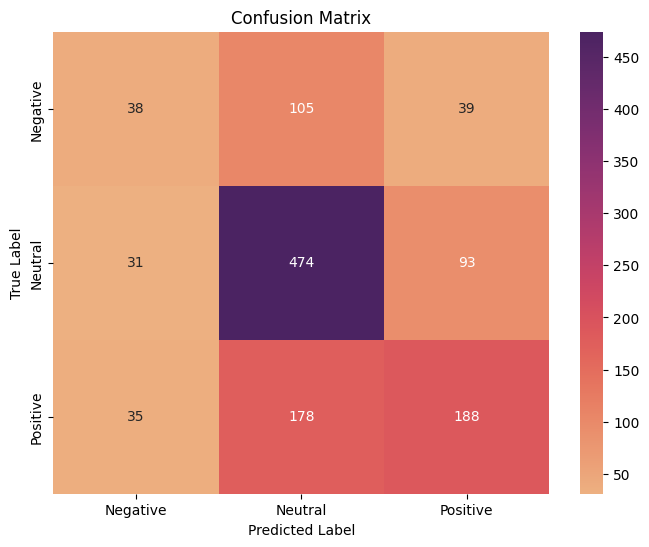

Accuracy: 0.5927180355630821
Classification report:
               precision    recall  f1-score   support

    Negative       0.37      0.21      0.27       182
     Neutral       0.63      0.79      0.70       598
    Positive       0.59      0.47      0.52       401

    accuracy                           0.59      1181
   macro avg       0.53      0.49      0.50      1181
weighted avg       0.57      0.59      0.57      1181



In [704]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusionmatrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusionmatrix, annot=True, fmt='d', cmap="flare", 
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# print accuracy and classification report
print("Accuracy:", accuracy)
print("Classification report:\n", report)

Then TfidVectorizer:

In [705]:
mnb = MultinomialNB(alpha=1.0, fit_prior=True) 
mnb.fit(tfidvector_X_train, y_train)

y_pred = mnb.predict(tfidvector_X_test)

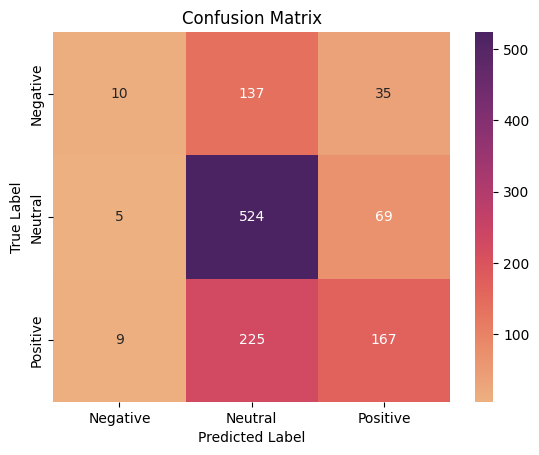

Accuracy: 0.5935647756138865
Classification report:
               precision    recall  f1-score   support

    Negative       0.42      0.05      0.10       182
     Neutral       0.59      0.88      0.71       598
    Positive       0.62      0.42      0.50       401

    accuracy                           0.59      1181
   macro avg       0.54      0.45      0.43      1181
weighted avg       0.57      0.59      0.54      1181



In [706]:
confusionmatrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

sns.heatmap(confusionmatrix, annot=True, fmt='d', cmap="flare", 
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# print accuracy and classification report
print("Accuracy:", accuracy)
print("Classification report:\n", report)

##### *BernoulliNB Classifier*

Bernoulli Naive Bayes is one of the variants of the Naive Bayes algorithm that is commonly used for text classification tasks. It assumes that each word in the dataset is independent of each other, which is a simplification that may result in lower accuracy than other models like Multinomial Naive Bayes and SVMs on datasets with a large number of words. 

https://towardsdatascience.com/demystifying-naive-bayes-e3698e74bf2


After testing with different alphas and fit_prior (True og False) we landed on these parameters. 

First with the CountVectorizer:

In [707]:
bnb = BernoulliNB(alpha=1.0, fit_prior=True)
bnb.fit(cvector_X_train, y_train)

y_pred = bnb.predict(cvector_X_test)

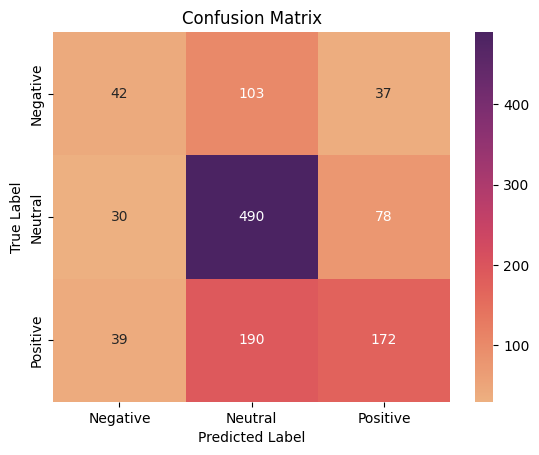

Accuracy: 0.5961049957662997
Classification report:
               precision    recall  f1-score   support

    Negative       0.38      0.23      0.29       182
     Neutral       0.63      0.82      0.71       598
    Positive       0.60      0.43      0.50       401

    accuracy                           0.60      1181
   macro avg       0.53      0.49      0.50      1181
weighted avg       0.58      0.60      0.57      1181



In [708]:
confusionmatrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

sns.heatmap(confusionmatrix, annot=True, fmt='d', cmap="flare", 
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# print accuracy and classification report
print("Accuracy:", accuracy)
print("Classification report:\n", report)

Then TfidVectorizer:

In [709]:
bnb = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True) 
bnb.fit(tfidvector_X_train, y_train)

y_pred = bnb.predict(tfidvector_X_test)

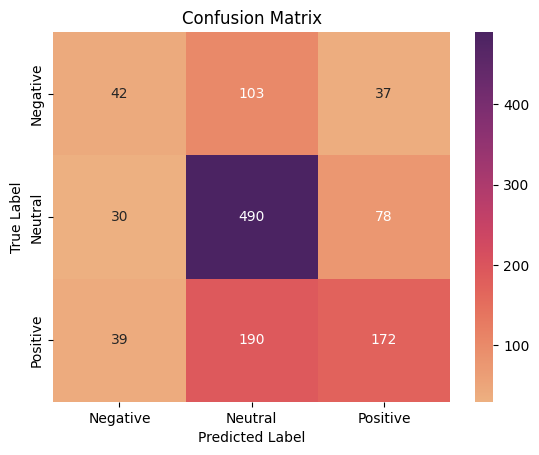

Accuracy: 0.5961049957662997
Classification report:
               precision    recall  f1-score   support

    Negative       0.38      0.23      0.29       182
     Neutral       0.63      0.82      0.71       598
    Positive       0.60      0.43      0.50       401

    accuracy                           0.60      1181
   macro avg       0.53      0.49      0.50      1181
weighted avg       0.58      0.60      0.57      1181



In [710]:
confusionmatrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

sns.heatmap(confusionmatrix, annot=True, fmt='d', cmap="flare", 
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# print accuracy and classification report
print("Accuracy:", accuracy)
print("Classification report:\n", report)

#### Support Vector Classification 
kernel='sigmoid' and C=1 gave us the highest score.

First with the CountVectorizer:

In [711]:
svm = SVC(kernel='sigmoid', C=1.0, random_state=42)
svm.fit(cvector_X_train, y_train)
y_pred = svm.predict(cvector_X_test)

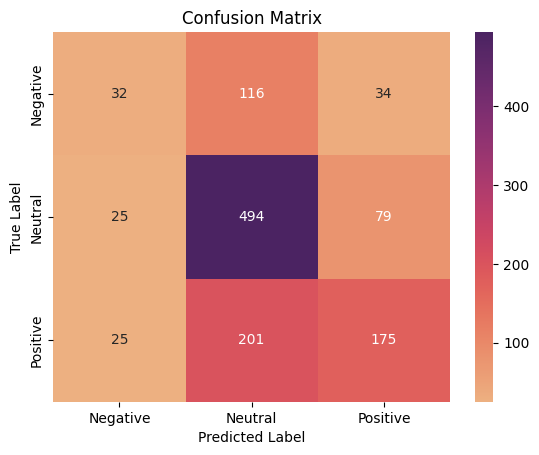

Accuracy: 0.5935647756138865
Classification report:
               precision    recall  f1-score   support

    Negative       0.39      0.18      0.24       182
     Neutral       0.61      0.83      0.70       598
    Positive       0.61      0.44      0.51       401

    accuracy                           0.59      1181
   macro avg       0.54      0.48      0.48      1181
weighted avg       0.57      0.59      0.56      1181



In [712]:
confusionmatrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

sns.heatmap(confusionmatrix, annot=True, fmt='d', cmap="flare", 
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# print accuracy and classification report
print("Accuracy:", accuracy)
print("Classification report:\n", report)

Then TfidVectorizer:

In [713]:
svm = SVC(kernel='sigmoid', C=1.0, random_state=42)
svm.fit(tfidvector_X_train, y_train)
y_pred = svm.predict(tfidvector_X_test)

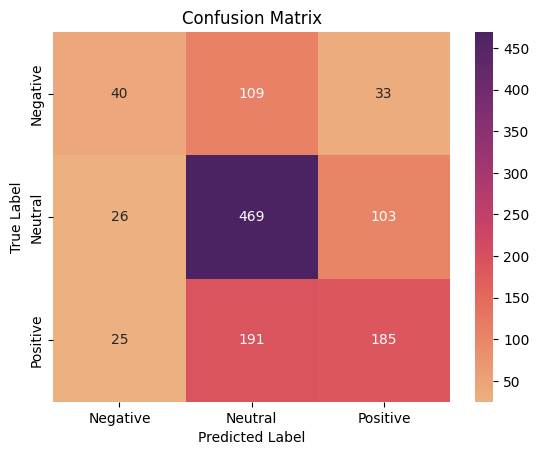

Accuracy: 0.5876375952582558
Classification report:
               precision    recall  f1-score   support

    Negative       0.44      0.22      0.29       182
     Neutral       0.61      0.78      0.69       598
    Positive       0.58      0.46      0.51       401

    accuracy                           0.59      1181
   macro avg       0.54      0.49      0.50      1181
weighted avg       0.57      0.59      0.57      1181



In [714]:
confusionmatrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

sns.heatmap(confusionmatrix, annot=True, fmt='d', cmap="flare", 
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# print accuracy and classification report
print("Accuracy:", accuracy)
print("Classification report:\n", report)

#### Testing the best performing model
We test the model with the highest accuracy on the validation data. svm with cvector.

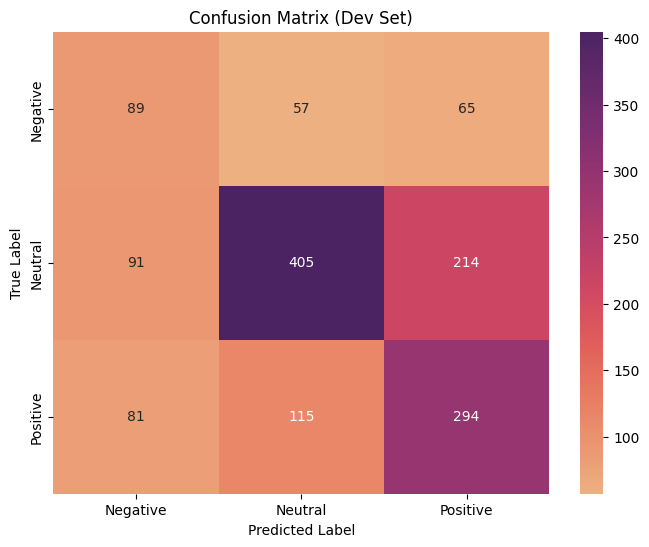

Accuracy (Dev Set): 0.5584691708008505
Classification report (Dev Set):
               precision    recall  f1-score   support

    Negative       0.34      0.42      0.38       211
     Neutral       0.70      0.57      0.63       710
    Positive       0.51      0.60      0.55       490

    accuracy                           0.56      1411
   macro avg       0.52      0.53      0.52      1411
weighted avg       0.58      0.56      0.57      1411



In [715]:
y_pred_dev = svm.predict(cvector_X_dev)
confusionmatrix_dev = confusion_matrix(y_dev, y_pred_dev)
accuracy_dev = accuracy_score(y_dev, y_pred_dev)
report_dev = classification_report(y_dev, y_pred_dev)

plt.figure(figsize=(8, 6))
sns.heatmap(confusionmatrix_dev, annot=True, fmt='d', cmap="flare", 
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix (Dev Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# print accuracy and classification report for dev set
print("Accuracy (Dev Set):", accuracy_dev)
print("Classification report (Dev Set):\n", report_dev)

#### Results and discussion 

When using the Mulitnominal Naive Bayes with the CountVectoritizer and TfidVectorizer we got almost the same result. The accuracy was 0.59 on both, but the F1 score is a little bit better on the CountVectorizer. For the Bernoulli Naive Bayes we got 0.60 on both vectorizers, and the Support Vector Classification got 0.60 on the CountVectorizer and 0.58 on the TfidVectorizer.

The model that got the highest accuracy was SVC with the CountVectorizer with an accuracy of 0.601. This is not a great accuracy but it is hard to get a good score when the norwegian stemmers/lemmatizers are not that great. The datasets are also unbalanced, the distribution positive/neutral/negative in the training data are different to the validation- and test data.

### **Task 3:** Convolutional neural networks

In this part of the project we will train a convolutional neural network as a binary classifier of one category in the data set that contains the 60000 images from the CIFAR-10 data set. 

We have used this website for inspiration: https://medium.com/mlearning-ai/image-classification-on-cifar-10-with-15-lines-of-code-52341e7fb00c

In [716]:
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from termcolor import colored
from PIL import Image

The downloaded CIFAR-10 dataset is a .tar file so we tar -xvf cifar-10-python.tar in the terminal to excract the files into a directory. Then we loaded the dataset. Using the b prefix because the data is stored as bytes when we use pickle. 

In [717]:
def load_data(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f, encoding='bytes')
        images = data[b'data']
        labels = data[b'labels']
        images = images.reshape((len(images), 3, 32, 32)).transpose(0, 2, 3, 1)
        return images, labels

def load_cifar10_data():
    # Load training data
    X_train = []
    y_train = []
    for i in range(1, 6):
        filename = 'cifar-10-batches-py/data_batch_' + str(i)
        images, labels = load_data(filename)
        X_train.append(images)
        y_train.append(labels)
    X_train = np.concatenate(X_train, axis=0)
    y_train = np.concatenate(y_train, axis=0)

    # Load testing data
    filename = 'cifar-10-batches-py/test_batch'
    X_test, y_test = load_data(filename)

    return (X_train, y_train), (X_test, y_test)
    
# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = load_cifar10_data()

From https://www.cs.toronto.edu/~kriz/cifar.html we have the following classes.

In [718]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Converting test data to numpy array.

In [719]:
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

### Vizualisation
To check if the loading of the data was correct, we visualize 100 random pictures from the traning data.

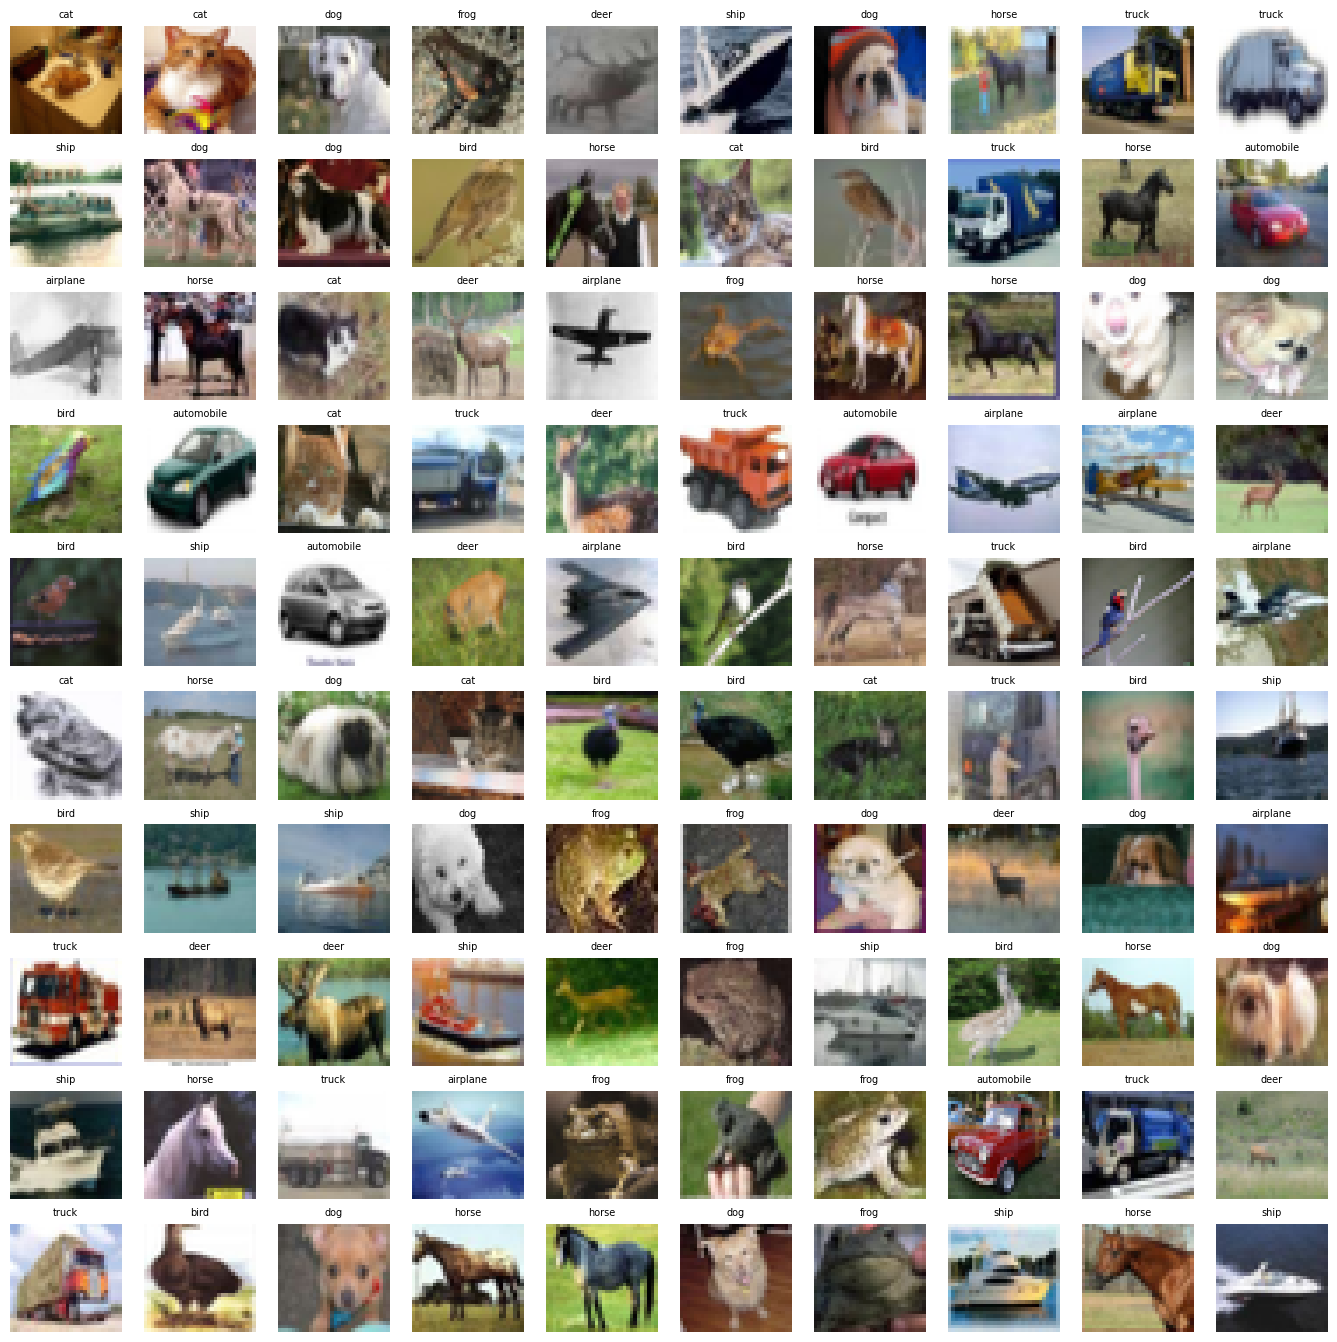

In [720]:
fig, axes = plt.subplots(10, 10, figsize = (17,17))

axes = axes.ravel()


for i in np.arange(0, 10 * 10):
    index = np.random.randint(0, len(X_train)) 
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(classes[label_index], fontsize = 7) 
    axes[i].axis('off')

### Choosing cathegory
We choose horse, which is at index 7 in our class list. To train the CNN like a binary classifier we want to filter the datasets to images of horses and not horses. We give the horses the label 1 by using np.ones() and not_horses the label 0 by using np.zeros().

In [721]:
horse_index = 7

horse_images = X_train[y_train == horse_index]
horse_labels = np.ones(10000)

horse_images_test = X_test[y_test == horse_index]
horse_labels_test = np.ones(2000)

print(len(horse_images))
print(len(horse_images_test))

5000
1000


The dataset contain 5000 pictures of each cathegory, therefore we will have 45000 pictures of not horses. We want to have a more equal distribution of horse and not_horse. If we keep the horse_images be 1/10 of the dataset, we can get a high accuracy, but only because the model will predict not_horse on everything. 

To prevent this we mirror all the horse pictures so we have double the amount of horse pictures. We also reduce the size of not_horse to 15000 images for the training data and 3000 images for the test data.

<Figure size 640x480 with 0 Axes>

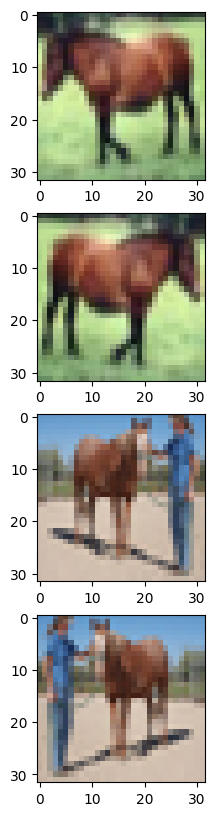

In [722]:
horse_images_flipped = np.flip(horse_images, axis = 2)

plt.figure()

f, axarr = plt.subplots(4,1, figsize=(10,10)) 

axarr[0].imshow(horse_images[0])
axarr[1].imshow(horse_images_flipped[0])
axarr[2].imshow(horse_images[4999])
axarr[3].imshow(horse_images_flipped[4999])

Concatenating the horse images and the flipped horse images.

In [723]:
horse_images = np.concatenate((horse_images, horse_images_flipped), axis = 0)
print(len(horse_images))

horse_images_flipped_test = np.flip(horse_images_test, axis = 2)

horse_images_test = np.concatenate((horse_images_test, horse_images_flipped_test), axis = 0)
len(horse_images_test)

10000


2000

This is where we changed the numbers of not_horse picturres. We have used len() alot through the task to check that the numbers of images and labels match.

In [724]:
not_horse_index =  [i for i in range(10) if i != horse_index]

not_horse_images = np.concatenate([X_train[y_train == i] for i in not_horse_index])    # horse should be 1 and not horse 0
selected_indices = np.random.choice(len(not_horse_images), size=15000, replace=False)
not_horse_images = not_horse_images[selected_indices]
not_horse_labels = np.zeros(len(not_horse_images))

not_horse_images_test = np.concatenate([X_test[y_test == i] for i in not_horse_index])    # horse should be 1 and not horse 0
selected_indices = np.random.choice(len(not_horse_images_test), size=3000, replace=False)
not_horse_images_test = not_horse_images_test[selected_indices]
not_horse_labels_test = np.zeros(len(not_horse_images_test))

print(len(not_horse_images))
print(len(not_horse_labels))
print(len(not_horse_images_test))
print(len(not_horse_labels_test))

15000
15000
3000
3000


In [725]:
print(len(horse_labels))
print(len(not_horse_labels))
print(len(horse_labels_test))
print(len(not_horse_labels_test))

10000
15000
2000
3000


We concatenate the the horse and not_horse images and labels to make the training and test datasets. We the use shuffle the data so that our model does not get trained to expect only horses at the beginning of the dataset, and only not horses at the end.

In [726]:
X_train = np.concatenate([horse_images, not_horse_images], axis=0)
y_train = np.concatenate([horse_labels, not_horse_labels], axis=0) 

X_test = np.concatenate([horse_images_test, not_horse_images_test], axis=0) 
y_test = np.concatenate([horse_labels_test, not_horse_labels_test], axis=0) 

In [727]:
np.random.seed(42)
shuffle_idx = np.random.permutation(len(X_train))
X_train = X_train[shuffle_idx]
y_train = y_train[shuffle_idx]

shuffle_idx_test = np.random.permutation(len(X_test))
X_test = X_test[shuffle_idx_test]
y_test = y_test[shuffle_idx_test]

Visualizing 10x10 random horse pictures to see if we separated data correctly.

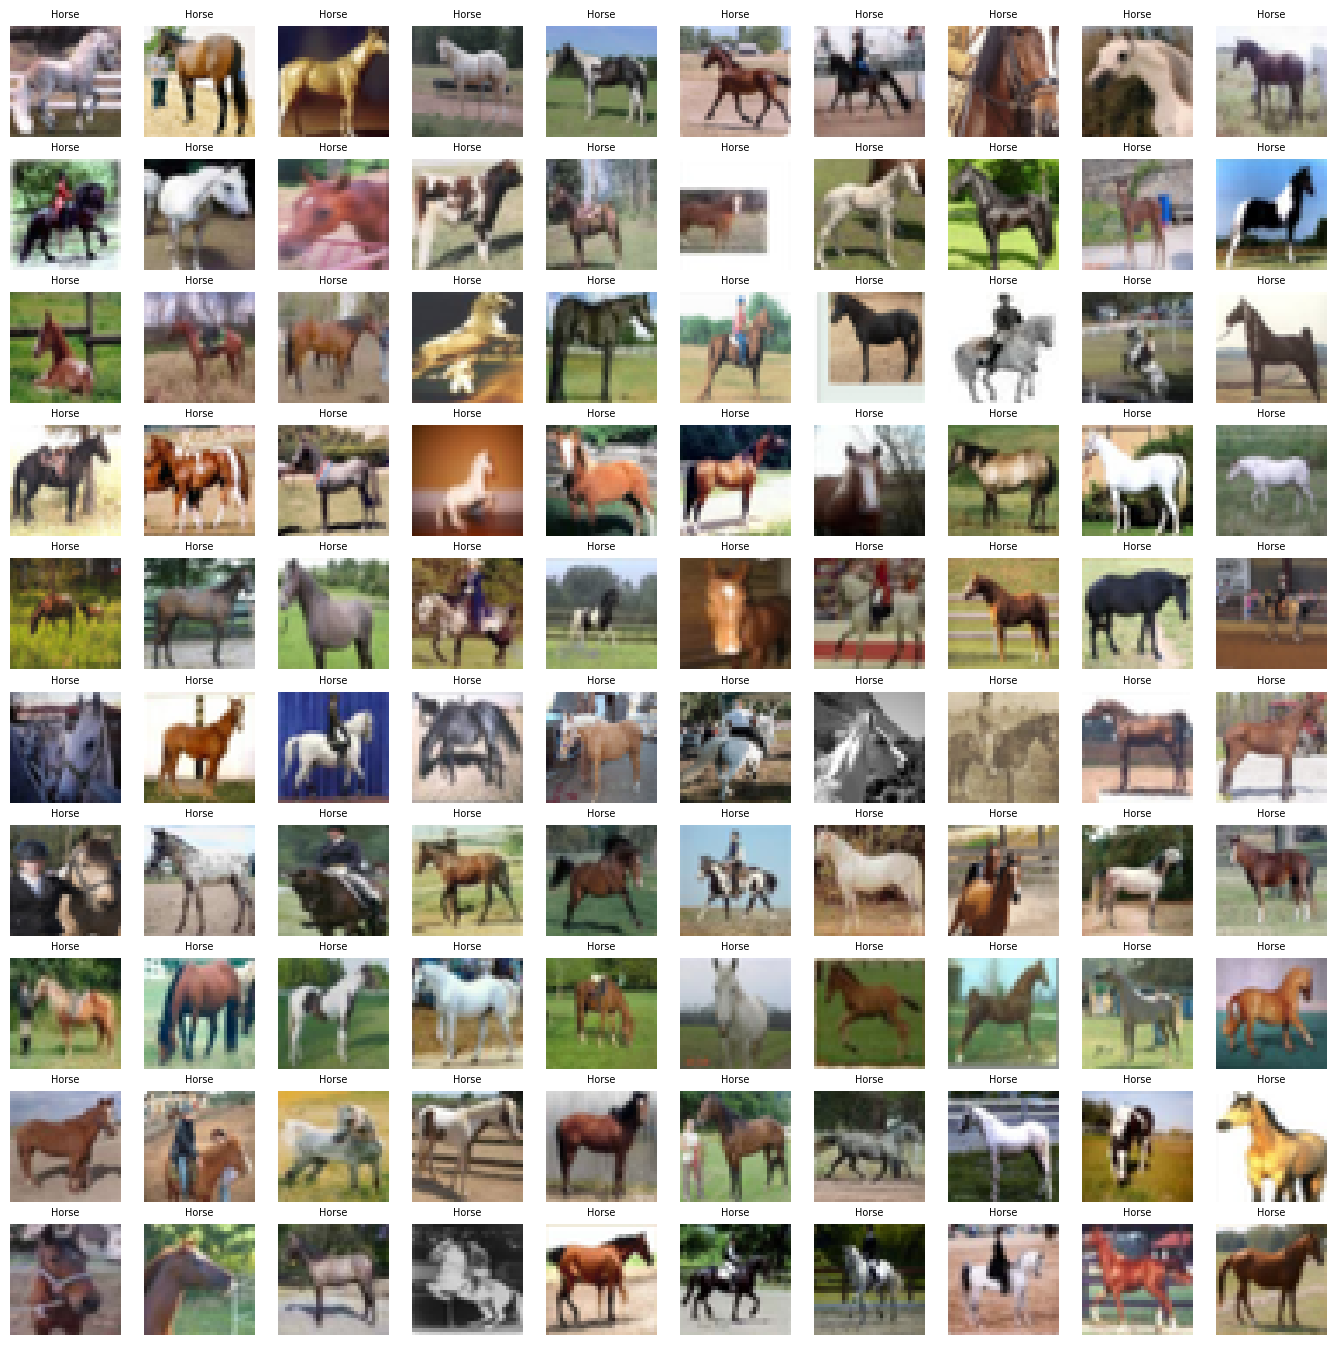

In [728]:
horse_indices = np.where(y_train == 1)[0]

np.random.shuffle(horse_indices)

horse_indices = horse_indices[:100]

fig, axes = plt.subplots(10, 10, figsize=(17, 17))

for i, idx in enumerate(horse_indices):
    row = i // 10
    col = i % 10
    img = X_train[idx]
    axes[row, col].imshow(img)
    axes[row, col].set_title('Horse', fontsize=7)
    axes[row, col].axis('off')

plt.show()


#### Data Augumentation
Data augumentation is pre-processing of the data in our model to try tp prevent overfitting. First we normalize our images and then we use ImageDataGenerator.

In [729]:
X_train = X_train / 255 ; X_test = X_test / 255

In [730]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                    zoom_range=0.05,
                                    width_shift_range=0.05,
                                    height_shift_range=0.05)

We use .flow to create the training dataset and 32 is a good batch size acording to this webpage https://wandb.ai/ayush-thakur/dl-question-bank/reports/What-s-the-Optimal-Batch-Size-to-Train-a-Neural-Network---VmlldzoyMDkyNDU#:~:text=Results%20Of%20Small%20vs%20Large,gave%20us%20the%20worst%20result. 

Batch size means the number of images that must have passed trhough the network so that the weights are updated. 

In [731]:
batch_size = 32

In [732]:
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
X_train = np.asarray(X_train)

In [733]:
train_generator = data_generator.flow(X_train, y_train, batch_size)

#### Building the model
We use ResNet50V, and for weights in the base model we use ImageNet, that have already been trained. For input shape we use the shape of the image. After making the base model we will be creating our own layer, so in the base model we just set include_top to False.

In [734]:
base_model = tf.keras.applications.ResNet50V2(include_top=False,
                        weights='imagenet',
                        input_shape= X_train.shape[1:])

To create our main model, we will first add the base model that we created earlier, and then add a Flatten layer. The Flatten layer takes the output from the base model and converts it into a 1-D array that can be passed to the next fully connected layers.

Next, we will add a Dense layer with 1024 units and a Dropout layer with a dropout rate of 0.2. The Dropout layer helps in reducing overfitting of the training data, which can improve the performance of our model. The last dense layer will have 10 output units with activation set to softmax since this is a multi-class classification problem.

In addition, to ensure that our model learns to distinguish between horse and not horse images, we need to balance our dataset by either reducing the number of not horse images or creating new horse images. If we skip this step, our model may appear to have a high accuracy, but it will likely just be guessing not horse for every image, which is not helpful.

In [735]:
model = tf.keras.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation=('relu')))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation=('softmax')))

In [736]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 1, 1, 2048)        23564800  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 10)                10250     
                                                                 
Total params: 25,673,226
Trainable params: 25,627,786
Non-trainable params: 45,440
_________________________________________________________________


#### Fitting the model

Before fitting the model we compiled it. 

In [737]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Fitting the model, and setting validation data to X_test, y_test. We chose 10 epochs, an epoch is one complete iteration through the entire training dataset during training of a machine learning model. We sat steps per epoch as the lenght of the training data divided by the batch size so each epoch consists of one full cycle through the training data. 

In [738]:
history = model.fit(train_generator,
                    validation_data=(X_test, y_test),
                    steps_per_epoch=X_train.shape[0]/batch_size,
                    epochs=10, 
                    verbose=1)

Epoch 1/10
781/781 [==============================] - 922s 1s/step - loss: 0.5632 - accuracy: 0.7766 - val_loss: 0.3342 - val_accuracy: 0.8618
Epoch 2/10
781/781 [==============================] - 902s 1s/step - loss: 0.3776 - accuracy: 0.8492 - val_loss: 0.2712 - val_accuracy: 0.8938
Epoch 3/10
781/781 [==============================] - 885s 1s/step - loss: 0.3930 - accuracy: 0.8348 - val_loss: 0.3993 - val_accuracy: 0.8172
Epoch 4/10
781/781 [==============================] - 867s 1s/step - loss: 0.3335 - accuracy: 0.8583 - val_loss: 0.2801 - val_accuracy: 0.8832
Epoch 5/10
781/781 [==============================] - 860s 1s/step - loss: 0.3103 - accuracy: 0.8744 - val_loss: 0.4805 - val_accuracy: 0.8038
Epoch 6/10
781/781 [==============================] - 825s 1s/step - loss: 0.3194 - accuracy: 0.8649 - val_loss: 0.3266 - val_accuracy: 0.8562
Epoch 7/10
781/781 [==============================] - 840s 1s/step - loss: 0.2741 - accuracy: 0.8865 - val_loss: 0.2486 - val_accuracy: 0.9040

We saved our model.

In [739]:
model.save("CIFAR-10.h5")

We opened a image of a horse using PIL and Image, and then calculated the prediction using predict().

In [740]:
image = Image.open('horse.jpg')
image = image.resize((32, 32))
image = np.array(image)
image = np.expand_dims(image, axis=0)

prediction = model.predict(image)
probability = prediction[0][0]

if probability > 0.5:
    print("This image is of a horse")
else:
    print("This image is not of a horse")
        

1/1 [==============================] - 1s 591ms/step
This image is of a horse


The accuracy is varies a bit, but is around 0.80-0.90. The model predict right most of the times, but we have tested with different images of horses and images of not horses, and sometimes it predict wrong. 

We have tried a lot of different methods to get our model to predict better and to get the accuracy up. Some of the things we have tried is: 
- Keep the datasets as they were, but then the model said "not horse" every time since it was trained on mostly pictures of not horses. 
- Reduce the pictures of not horses, but it did not help. 
- In addtion to this, we have experienced overfitting and bad accuracy. 

We ended up flipping the horse pictures in both the training and test data to get twice as much pictures of horses, and reduce the pictures of not horses to 15000 for training data and 3000 for test data. This means that the there are less data, but it was what worked best. 

We are aware of that the model does not perform good all the time, but we have tried a lot and ended up with this solution. 